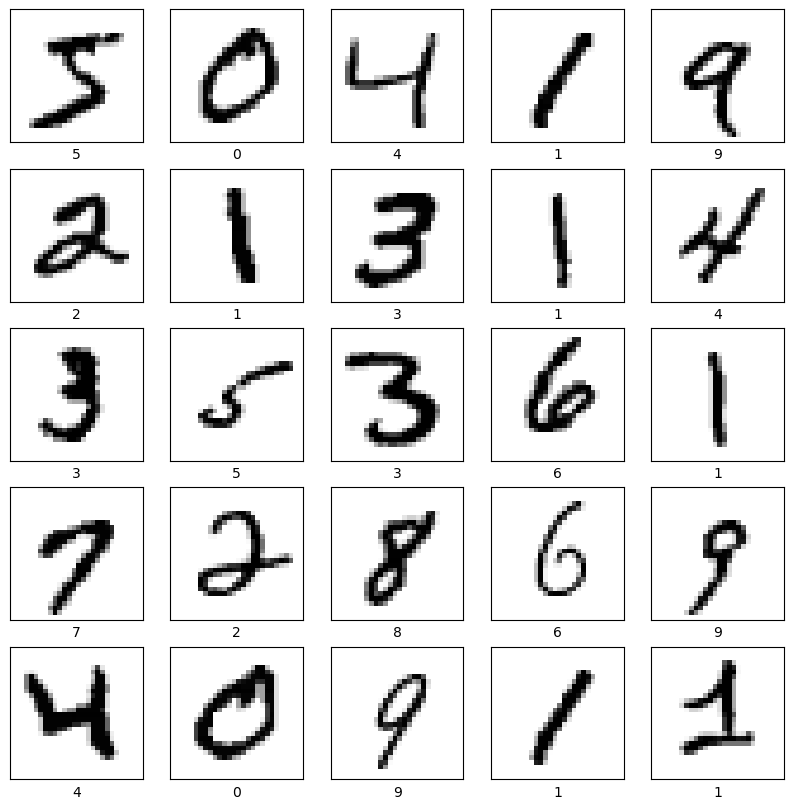

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4508 - dense_19_loss: 0.2936 - dense_20_loss: 0.1572 - dense_19_accuracy: 0.9152 - dense_20_accuracy: 0.9421 - val_loss: 0.2726 - val_dense_19_loss: 0.1719 - val_dense_20_loss: 0.1007 - val_dense_19_accuracy: 0.9510 - val_dense_20_accuracy: 0.9639
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2089 - dense_19_loss: 0.1339 - dense_20_loss: 0.0750 - dense_19_accuracy: 0.9598 - dense_20_accuracy: 0.9745 - val_loss: 0.1984 - val_dense_19_loss: 0.1238 - val_dense_20_loss: 0.0746 - val_dense_19_accuracy: 0.9639 - val_dense_20_accuracy: 0.9755
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1505 - dense_19_loss: 0.0934 - dense_20_loss: 0.0570 - dense_19_accuracy: 0.9728 - dense_20_accuracy: 0.9806 - val_loss: 0.1695 - val_dense_19_loss: 0.1022 - val_dense_20_loss: 0.0673 - val_dense_19_accuracy: 0.9703 - val_dense_20_accuracy: 0.9780
Epoch 4/20
1500/1500 [

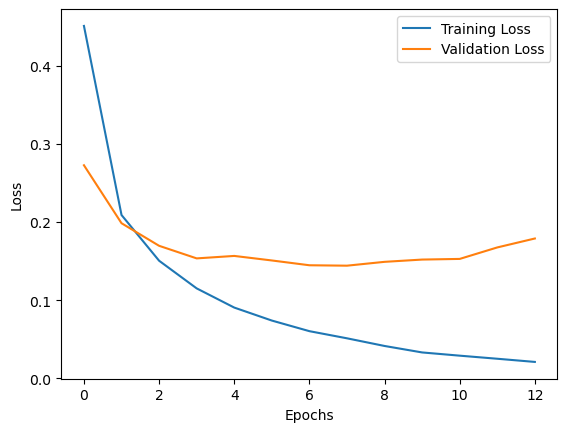

In [6]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt

mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

y_train_parity = np.array([np.sum(np.array(list(map(int, str(y))))) % 2 for y in y_train])
y_test_parity = np.array([np.sum(np.array(list(map(int, str(y))))) % 2 for y in y_test])

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

inputs = keras.Input(shape=(28, 28))
x = layers.Flatten()(inputs)
x = layers.Dense(128, activation='relu')(x)

outputs_digits = layers.Dense(10, activation='softmax')(x)

outputs_parity = layers.Dense(1, activation='sigmoid')(x)

model = keras.Model(inputs=inputs, outputs=[outputs_digits, outputs_parity])


inputs = keras.Input(shape=(28, 28))
x = layers.Flatten()(inputs)
x = layers.Dense(128, activation='relu')(x)

outputs = layers.Dense(10, activation='softmax')(x)

outputs_parity = layers.Dense(1, activation='sigmoid')(x)

model = keras.Model(inputs=inputs, outputs=[outputs, outputs_parity])

model.compile(
    optimizer='adam',
    loss=['sparse_categorical_crossentropy', 'binary_crossentropy'],
    metrics=[['accuracy'], ['accuracy']]
)

early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    x_train,
    [y_train, y_train_parity],
    epochs=20,
    validation_split=0.2,
    callbacks=[early_stopping]
)

early_stopping_epoch = np.argmin(history.history['val_loss']) + 1
print("\n\nEarly stopping occurred at epoch", early_stopping_epoch)

plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


